# Data Exploration - Domestic Energy Ratings in England and Wales

The aim of this project is to look at the energy ratings (EPC) of domestic properties in England and Wales. I want to analyse this data and present it in an interactive format (with maps). 

If possible, I would like to perform some machine learning and perhaps create an output website where people can look up the ratings of their area and see the trends for future years.

The data is from the [UK Gov Live tables on Energy Performance of Buildings Certificates](https://www.gov.uk/government/statistical-data-sets/live-tables-on-energy-performance-of-buildings-certificates), table D3.



### What questions can I answer with this dataset?
- Which region is performing best wrt EPC ratings?
- Which region is the worst performing wrt EPC ratings?

- What is the overall trend for EPC ratings over time (increasing, decreasing, stangant)?


Steps:

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv = 'dataset_2.csv'
data = pd.read_csv(csv)
df = pd.DataFrame(data)

In [3]:
df

,Local Authority Code,Local Authority,Quarter,Number of Lodgements,Total Floor Area (m2),A,B,C,D,E,F,G,Not recorded
0,E07000223,Adur,2008/4,523,"36,756",0,39,104,195,130,51,4.0,0.0
1,E07000223,Adur,2009/1,536,"40,605",0,51,102,169,167,45,2.0,0.0
2,E07000223,Adur,2009/2,543,"39,699",0,62,85,178,173,43,2.0,0.0
3,E07000223,Adur,2009/3,527,"38,287",0,33,75,197,174,46,2.0,0.0
4,E07000223,Adur,2009/4,426,"31,243",0,27,78,160,125,31,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19308,E06000014,York,2022/1,"1,261","110,074",18,178,301,534,178,50,2.0,0.0
19309,E06000014,York,2022/2,"1,282","110,194",3,89,301,557,209,116,7.0,0.0
19310,E06000014,York,2022/3,"1,356","115,469",11,156,338,592,213,40,6.0,0.0
19311,E06000014,York,2022/4,"1,437","118,357",35,95,468,598,200,33,8.0,0.0


In [4]:
#making column names simpler to use. Create list, fix, replace columns with new list.

cols = df.columns.to_list()

#cleaning column names

new_cols = []

for item in cols:
    item = item.lower()
    item = re.sub(' ','_', item)
    item = re.sub(r'\(','', item)
    item = re.sub(r'\)','', item)
    item = re.sub(r'/','', item)
    item = re.sub(r'£','', item)
    item = re.sub('__','_', item)
    new_cols.append(item)

df.columns = new_cols

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19313 entries, 0 to 19312
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   local_authority_code  19312 non-null  object 
 1   local_authority       19312 non-null  object 
 2   quarter               19312 non-null  object 
 3   number_of_lodgements  19312 non-null  object 
 4   total_floor_area_m2   19312 non-null  object 
 5   a                     19312 non-null  object 
 6   b                     19312 non-null  object 
 7   c                     19312 non-null  object 
 8   d                     19312 non-null  object 
 9   e                     19312 non-null  object 
 10  f                     19312 non-null  object 
 11  g                     19312 non-null  float64
 12  not_recorded          19312 non-null  float64
dtypes: float64(2), object(11)
memory usage: 1.9+ MB


In [5]:
#converting the number columns to floats
df.iloc[:,3:] = df.iloc[:,3:].replace(',','', regex=True).astype(float)

/var/folders/jb/5csh6qnx4y7brg28_7d39qyw0000gq/T/ipykernel_32855/273472227.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,3:] = df.iloc[:,3:].replace(',','', regex=True).astype(float)


In [6]:
#converting the quarter format to datetime
df['quarter'] = df['quarter'].replace('/', '-Q', regex=True)
df['quarter'] = pd.to_datetime(df['quarter'])

In [7]:
df = df.replace(r'Unknown', np.NaN, regex=True)

In [8]:
df = df.dropna()
df

,local_authority_code,local_authority,quarter,number_of_lodgements,total_floor_area_m2,a,b,c,d,e,f,g,not_recorded
0,E07000223,Adur,2008-10-01,523.0,36756.0,0.0,39.0,104.0,195.0,130.0,51.0,4.0,0.0
1,E07000223,Adur,2009-01-01,536.0,40605.0,0.0,51.0,102.0,169.0,167.0,45.0,2.0,0.0
2,E07000223,Adur,2009-04-01,543.0,39699.0,0.0,62.0,85.0,178.0,173.0,43.0,2.0,0.0
3,E07000223,Adur,2009-07-01,527.0,38287.0,0.0,33.0,75.0,197.0,174.0,46.0,2.0,0.0
4,E07000223,Adur,2009-10-01,426.0,31243.0,0.0,27.0,78.0,160.0,125.0,31.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19307,E06000014,York,2021-10-01,1152.0,93729.0,8.0,177.0,292.0,454.0,174.0,41.0,6.0,0.0
19308,E06000014,York,2022-01-01,1261.0,110074.0,18.0,178.0,301.0,534.0,178.0,50.0,2.0,0.0
19309,E06000014,York,2022-04-01,1282.0,110194.0,3.0,89.0,301.0,557.0,209.0,116.0,7.0,0.0
19310,E06000014,York,2022-07-01,1356.0,115469.0,11.0,156.0,338.0,592.0,213.0,40.0,6.0,0.0


In [9]:
#How many local authorities are in the dataset?

total_las = len(df['local_authority'].unique())

print('Total Local Authorities = {}'.format(total_las))

Total Local Authorities = 342


## Finding the best and worst performing regions

Method:

- A lodgement is taken of a new EPC rating when a property is sold or newly let. New lodgements are recorded each quarter.
- The quarter doesn't really help me, so going to sum by year for each region
- A simple count of lodgements wont' tell us much, as some regions will have more property changes than others. So, convert to percentages.
- Find the regions with the highest percentages of A-graded EPC properties (and for each subsequent grade)

In [10]:
df = df.copy(deep=True)

In [11]:
#summing by year for each region

#getting the year
df['year'] = df['quarter'].dt.year
#new groupby dataframe to sum quarterly counts into yearly counts, by local authority
df_years = df.groupby(['local_authority_code','local_authority','year'])[['number_of_lodgements','a','b','c','d','e','f','g','not_recorded']].sum()

In [12]:
df_years

number_of_lodgements     a      b  \
local_authority_code local_authority year                                      
E06000001            Hartlepool      2008                1169.0   0.0  126.0   
                                     2009                3400.0   0.0  531.0   
                                     2010                2853.0  10.0  249.0   
                                     2011                2596.0  18.0  285.0   
                                     2012                2511.0   9.0  185.0   
...                                                         ...   ...    ...   
W06000024            Merthyr Tydfil  2018                 783.0   2.0   53.0   
                                     2019                3335.0   6.0  117.0   
                                     2020                2097.0   1.0  117.0   
                                     2021                1711.0   1.0   97.0   
                                     2022                1450.0  14.0  140.0   

                                                c       d      e      f     g  \
local_authority_code local_authority year                                       
E06000001            Hartlepool      2008   207.0   456.0  298.0   82.0   0.0   
                                     2009   720.0  1159.0  776.0  200.0  14.0   
                                     2010   636.0  1189.0  589.0  165.0  15.0   
                                     2011   605.0   983.0  573.0  116.0  16.0   
                                     2012   675.0  1062.0  452.0  114.0  14.0   
...                                           ...     ...    ...    ...   ...   
W06000024            Merthyr Tydfil  2018   167.0   323.0  181.0   48.0   9.0   
                                     2019  1304.0  1413.0  398.0   80.0  17.0   
                                     2020   602.0   985.0  348.0   40.0   4.0   
                                     2021   676.0   675.0  222.0   34.0   6.0   
                                     2022   538.0   547.0  180.0   25.0   6.0   

                                           not_recorded  
local_authority_code local_authority year                
E06000001            Hartlepool      2008           0.0  
                                     2009           0.0  
                                     2010           0.0  
                                     2011           0.0  
                                     2012           0.0  
...                                                 ...  
W06000024            Merthyr Tydfil  2018           0.0  
                                     2019           0.0  
                                     2020           0.0  
                                     2021           0.0  
                                     2022           0.0  

[5077 rows x 9 columns]

In [13]:
df_years = df_years.reset_index()

In [14]:
#Adding a boolean column to see if a local authority is a London Borough
#Using ONS labeling standards, local authority code E09 = London Boroughs
#This column will help us understand the data better later on
df_years['is_greater_london'] = df_years['local_authority_code'].str.contains('E09')

In [15]:
#Creating a function that will automatically calculate the
#percentage of properties lodged under each grade for each local authority, every year

ratings = ['a','b','c','d','e','f','g']

def percentager(dataframe):
    for item in ratings:
        dataframe['percentage_'+item] = round(100*(dataframe[item]/dataframe['number_of_lodgements']),2)
    return dataframe

In [16]:
df_years = df_years.apply(percentager, axis=1)

In [17]:
#Finding the top 10 performing regions - i.e. those with the most A rated EPC properties in 2022
most_a = df_years[df_years['year'] == 2022].nlargest(10, 'percentage_a')
most_a

,local_authority_code,local_authority,year,number_of_lodgements,a,b,c,d,e,f,g,not_recorded,is_greater_london,percentage_a,percentage_b,percentage_c,percentage_d,percentage_e,percentage_f,percentage_g
4281,E09000002,Barking and Dagenham,2022,5485.0,1081.0,792.0,1076.0,1677.0,755.0,93.0,11.0,0.0,True,19.71,14.44,19.62,30.57,13.76,1.70,0.20
4386,E09000009,Ealing,2022,11776.0,2320.0,1192.0,2969.0,3377.0,1671.0,221.0,26.0,0.0,True,19.70,10.12,25.21,28.68,14.19,1.88,0.22
4326,E09000005,Brent,2022,8366.0,1308.0,988.0,2000.0,2566.0,1306.0,183.0,15.0,0.0,True,15.63,11.81,23.91,30.67,15.61,2.19,0.18
4626,E09000025,Newham,2022,12161.0,1882.0,2320.0,3598.0,2899.0,1288.0,165.0,9.0,0.0,True,15.48,19.08,29.59,23.84,10.59,1.36,0.07
4701,E09000030,Tower Hamlets,2022,10923.0,1641.0,2818.0,3473.0,1992.0,876.0,117.0,6.0,0.0,True,15.02,25.80,31.80,18.24,8.02,1.07,0.05
3336,E07000217,Woking,2022,3368.0,486.0,297.0,983.0,1113.0,416.0,69.0,4.0,0.0,False,14.43,8.82,29.19,33.05,12.35,2.05,0.12
4416,E09000011,Greenwich,2022,7751.0,1073.0,1133.0,2083.0,2139.0,1129.0,172.0,22.0,0.0,True,13.84,14.62,26.87,27.60,14.57,2.22,0.28
4446,E09000013,Hammersmith and Fulham,2022,7911.0,1052.0,804.0,2684.0,2347.0,900.0,107.0,17.0,0.0,True,13.30,10.16,33.93,29.67,11.38,1.35,0.21
4521,E09000018,Hounslow,2022,7499.0,988.0,661.0,2160.0,2396.0,1118.0,158.0,18.0,0.0,True,13.18,8.81,28.80,31.95,14.91,2.11,0.24
4491,E09000016,Havering,2022,6484.0,719.0,687.0,1256.0,2227.0,1332.0,229.0,34.0,0.0,True,11.09,10.60,19.37,34.35,20.54,3.53,0.52


In [18]:
#color = ['lime', 'limegreen', 'yellowgreen', 'gold', 'darkorange', 'orangered','red']

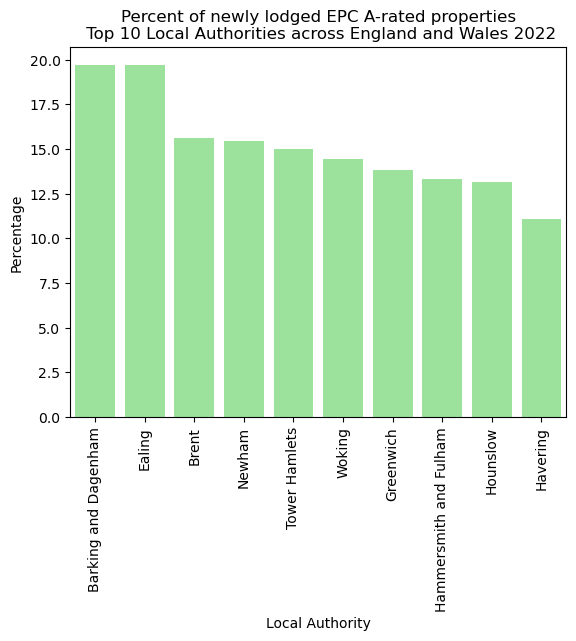

<Figure size 640x480 with 0 Axes>

In [19]:
ax1 = sns.barplot(data=most_a, x='local_authority', y='percentage_a', color='lightgreen')
plt.xlabel('Local Authority')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percent of newly lodged EPC A-rated properties\n Top 10 Local Authorities across England and Wales 2022')
plt.show()
plt.savefig('pct_a_rated.jpg')

In [20]:
#Bottom 10 performing regions - i.e. those with the most G rated properties in 2022
most_g = df_years[df_years['year'] == 2022].nlargest(10, ['percentage_g']).sort_values(by='percentage_g',
                                                                                      ascending=False)
most_g

,local_authority_code,local_authority,year,number_of_lodgements,a,b,c,d,e,f,g,not_recorded,is_greater_london,percentage_a,percentage_b,percentage_c,percentage_d,percentage_e,percentage_f,percentage_g
4776,W06000002,Gwynedd,2022,3606.0,77.0,149.0,597.0,999.0,905.0,674.0,205.0,0.0,False,2.14,4.13,16.56,27.70,25.10,18.69,5.68
5061,W06000023,Powys,2022,3419.0,119.0,356.0,603.0,887.0,869.0,444.0,141.0,0.0,False,3.48,10.41,17.64,25.94,25.42,12.99,4.12
1048,E07000030,Eden,2022,2164.0,41.0,428.0,396.0,513.0,433.0,278.0,75.0,0.0,False,1.89,19.78,18.30,23.71,20.01,12.85,3.47
4851,W06000008,Ceredigion,2022,2228.0,54.0,230.0,396.0,528.0,600.0,347.0,73.0,0.0,False,2.42,10.32,17.77,23.70,26.93,15.57,3.28
1303,E07000047,West Devon,2022,1762.0,19.0,391.0,279.0,441.0,377.0,200.0,55.0,0.0,False,1.08,22.19,15.83,25.03,21.40,11.35,3.12
4761,W06000001,Isle of Anglesey,2022,2067.0,67.0,319.0,303.0,482.0,521.0,311.0,64.0,0.0,False,3.24,15.43,14.66,23.32,25.21,15.05,3.10
2751,E07000167,Ryedale,2022,2016.0,28.0,360.0,309.0,503.0,475.0,282.0,59.0,0.0,False,1.39,17.86,15.33,24.95,23.56,13.99,2.93
4866,W06000009,Pembrokeshire,2022,3215.0,88.0,374.0,604.0,939.0,810.0,312.0,88.0,0.0,False,2.74,11.63,18.79,29.21,25.19,9.70,2.74
734,E06000052,Cornwall,2022,19138.0,325.0,3071.0,3743.0,4568.0,4533.0,2387.0,511.0,0.0,False,1.70,16.05,19.56,23.87,23.69,12.47,2.67
1228,E07000042,Mid Devon,2022,2275.0,31.0,326.0,530.0,603.0,478.0,256.0,51.0,0.0,False,1.36,14.33,23.30,26.51,21.01,11.25,2.24


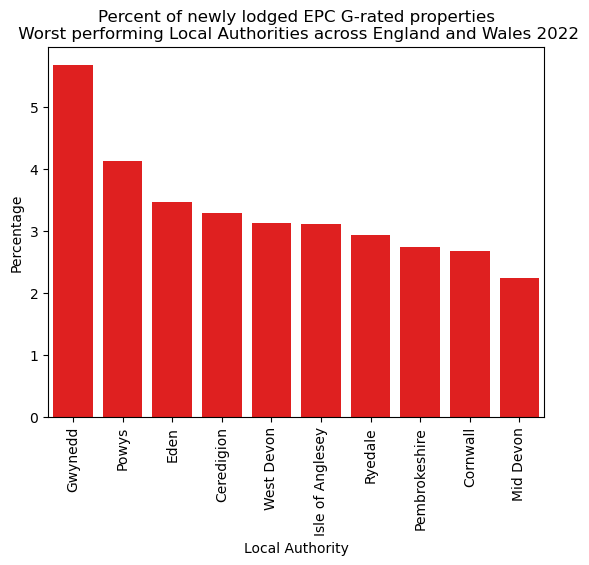

<Figure size 640x480 with 0 Axes>

In [21]:
ax2 = sns.barplot(data=most_g, x='local_authority', y='percentage_g', color='red')
plt.xlabel('Local Authority')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percent of newly lodged EPC G-rated properties\n Worst performing Local Authorities across England and Wales 2022')
plt.show()

plt.savefig('pct_g_rated.jpg')

So far we can see that the 9/10 of the areas with the most newly-lodged A-rated EPC properties in 2022 were in London Boroughs. In contrast, 10/10 of the regions with the most newly-lodged G-rated EPC properties were outside London, with 50% of them in Wales, 3 in Devon and Cornwall, and 2 in the north of England (Ryedale, Eden).

However, G-rated properites seem to take up quite a small number of new lodgements in 2022, at most just under 6%. Perhaps we should look at G and F rated properties together for more insight.

In [22]:
#Bottom 10 performing regions - i.e. those with the most F AND G combined rated properties in 2022
df_years['f_and_g'] = df_years['percentage_f'] + df_years['percentage_g']

most_f_and_g= df_years[df_years['year'] == 2022].nlargest(10,['f_and_g']).sort_values(by='f_and_g', ascending=False)
most_f_and_g

,local_authority_code,local_authority,year,number_of_lodgements,a,b,c,d,e,f,...,not_recorded,is_greater_london,percentage_a,percentage_b,percentage_c,percentage_d,percentage_e,percentage_f,percentage_g,f_and_g
749,E06000053,Isles of Scilly,2022,48.0,1.0,2.0,1.0,8.0,16.0,19.0,...,0.0,False,2.08,4.17,2.08,16.67,33.33,39.58,2.08,41.66
4776,W06000002,Gwynedd,2022,3606.0,77.0,149.0,597.0,999.0,905.0,674.0,...,0.0,False,2.14,4.13,16.56,27.70,25.10,18.69,5.68,24.37
4851,W06000008,Ceredigion,2022,2228.0,54.0,230.0,396.0,528.0,600.0,347.0,...,0.0,False,2.42,10.32,17.77,23.70,26.93,15.57,3.28,18.85
4761,W06000001,Isle of Anglesey,2022,2067.0,67.0,319.0,303.0,482.0,521.0,311.0,...,0.0,False,3.24,15.43,14.66,23.32,25.21,15.05,3.10,18.15
5061,W06000023,Powys,2022,3419.0,119.0,356.0,603.0,887.0,869.0,444.0,...,0.0,False,3.48,10.41,17.64,25.94,25.42,12.99,4.12,17.11
2751,E07000167,Ryedale,2022,2016.0,28.0,360.0,309.0,503.0,475.0,282.0,...,0.0,False,1.39,17.86,15.33,24.95,23.56,13.99,2.93,16.92
2533,E07000146,King's Lynn and West Norfolk,2022,5130.0,18.0,562.0,703.0,1252.0,1735.0,778.0,...,0.0,False,0.35,10.96,13.70,24.41,33.82,15.17,1.60,16.77
1048,E07000030,Eden,2022,2164.0,41.0,428.0,396.0,513.0,433.0,278.0,...,0.0,False,1.89,19.78,18.30,23.71,20.01,12.85,3.47,16.32
734,E06000052,Cornwall,2022,19138.0,325.0,3071.0,3743.0,4568.0,4533.0,2387.0,...,0.0,False,1.70,16.05,19.56,23.87,23.69,12.47,2.67,15.14
2548,E07000147,North Norfolk,2022,2987.0,21.0,234.0,583.0,858.0,847.0,388.0,...,0.0,False,0.70,7.83,19.52,28.72,28.36,12.99,1.87,14.86


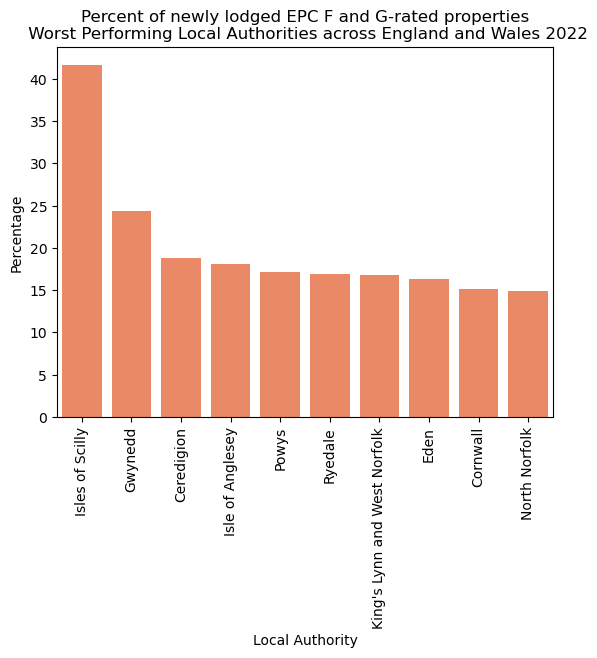

<Figure size 640x480 with 0 Axes>

In [23]:
ax3 = sns.barplot(data=most_f_and_g, x='local_authority', y='f_and_g', color='coral')
plt.xlabel('Local Authority')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percent of newly lodged EPC F and G-rated properties\n Worst Performing Local Authorities across England and Wales 2022')
plt.show()

plt.savefig('pct_f_g_rated.jpg')

In [24]:
mean_f_and_g = round(most_f_and_g['f_and_g'].mean(),2)
print('Average % of lodgements in the the worst performing areas at rating F or G = {}%'.format(mean_f_and_g))

Average % of lodgements in the the worst performing areas at rating F or G = 20.02%


In [25]:
#The mean without Scilly in the top 10
mean_most_f_and_g_no_scilly = most_f_and_g.iloc[1:,-1].mean()
print('Average % of lodgements in the the worst performing areas at rating F or G, excluding Isles of Scilly = {}%'.format(mean_most_f_and_g_no_scilly))

Average % of lodgements in the the worst performing areas at rating F or G, excluding Isles of Scilly = 17.61%


In [26]:
df_2022 = df_years[df_years['year'] == 2022]
df_2022['f_and_g'].describe()

count    331.000000
mean       5.367613
std        3.928179
min        0.860000
25%        3.050000
50%        4.280000
75%        6.525000
max       41.660000
Name: f_and_g, dtype: float64

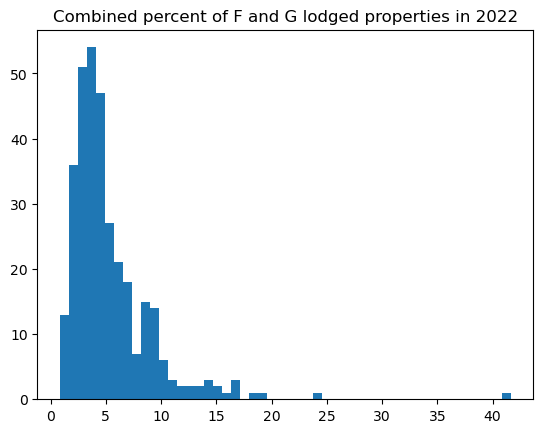

<Figure size 640x480 with 0 Axes>

In [27]:
ax4 = plt.hist(df_2022['f_and_g'], bins=50)
plt.title('Combined percent of F and G lodged properties in 2022')
plt.show()

plt.savefig('f_g_hist.jpg')

The named on our list of local authorities with the most F and G lodged properties combined in 2022 is not too different to the names listed in the G-only chart.

However, we can see that in these worst-performing regions, F and G rated properties accounted for 20.02% of new lodgements in 2022. The average for the whole list in 2022 is 5.3%, and the standard deviation is 3.9%, so areas in these poorly performing regions are in the extreme end of the scale (shown in the histogram above)

5 of the top 10 in this list are again are in Wales, two in Norfolk, two in the Cornwall area (Isles of Scilly being off the cost of Cornwall) and 1 in the north of England (Eden). None are in London.

The Isles of Scilly is particulary poor performing and is bringing up the average slightly - without it, the mean of the remaining 9 local authorities in that list is 17.61%. However there is also quite a small number of lodgements happening in that area annually - the smallest number of all regions, as shown below.

In [28]:
#Top 3 Local Authorities with the fewest lodgements in 2022
df_years[df_years['year'] == 2022].nsmallest(3,'number_of_lodgements')

,local_authority_code,local_authority,year,number_of_lodgements,a,b,c,d,e,f,...,not_recorded,is_greater_london,percentage_a,percentage_b,percentage_c,percentage_d,percentage_e,percentage_f,percentage_g,f_and_g
749,E06000053,Isles of Scilly,2022,48.0,1.0,2.0,1.0,8.0,16.0,19.0,...,0.0,False,2.08,4.17,2.08,16.67,33.33,39.58,2.08,41.66
4266,E09000001,City of London,2022,429.0,27.0,62.0,171.0,109.0,47.0,11.0,...,0.0,True,6.29,14.45,39.86,25.41,10.96,2.56,0.47,3.03
254,E06000017,Rutland,2022,918.0,6.0,95.0,228.0,320.0,181.0,77.0,...,0.0,False,0.65,10.35,24.84,34.86,19.72,8.39,1.20,9.59


As the mean shown above is around 5%, what percentage of regions with > 5% F and G rated properties are in London vs outside London?

In [29]:
#percentage to calculate
pct = 5

#filter for London data
london_greater_than_x_pct_f_g = df_years[(df_years['year'] == 2022) 
                                   & (df_years['f_and_g'] >= pct)
                                   & (df_years['is_greater_london'] == True)].sort_values(by='f_and_g')

#filter for non-London data
non_london_greater_than_x_pct_f_g = df_years[(df_years['year'] == 2022) 
                                   & (df_years['f_and_g'] >= pct)
                                   & (df_years['is_greater_london'] == False)].sort_values(by='f_and_g')


total_non_london = non_london_greater_than_x_pct_f_g['is_greater_london'].value_counts().sum()
total_london = london_greater_than_x_pct_f_g['is_greater_london'].value_counts().sum()

print('Number of non-London regions with >{}% F and G EPC rated properties registered in 2022 = {}'
      .format(pct, total_non_london))


print('Number of London regions with >{}% F and G EPC rated properties registered in 2022 = {}'
      .format(pct, total_london))

proportion_non_london = round(100*total_non_london/len(df_years['local_authority'].unique()),2)

print('\nProportion of regions with >5% F and G EPC rated properties registered in 2022 = {}'
      .format(proportion_non_london))

Number of non-London regions with >5% F and G EPC rated properties registered in 2022 = 127
Number of London regions with >5% F and G EPC rated properties registered in 2022 = 1

Proportion of regions with >5% F and G EPC rated properties registered in 2022 = 37.13


That's quite a staggering difference between the capital and the rest of England and Wales. Just 1 London borough had >5% of it's properties registered as F or G rated in 2022, compared to outside the capital where 127 regions, or over 1/3 of regions overall, had >5% of their registered properties in 2022 rated F or G.

Shall we see how this trend has changed over the years?

In [30]:
#Creating a filter for London Boroughs versus non-London Local Authorities

london_filter = df['local_authority_code'].str.contains('E09')

#Finding the total london and non-london local authorities - helpful for later calcs
total_london_las = len(df[london_filter].local_authority.unique())
total_non_london_las = len(df[~london_filter].local_authority.unique())

In [31]:
#Creating filtered df of London Boroughs with >5% F and G properties, all years
london_f_g_x_pct = df_years[(df_years['f_and_g'] >= pct)
                                   & (df_years['is_greater_london'] == True)].sort_values(by='f_and_g')

#Creating filtered df of non-London LAs with >5% F and G properties, all years
non_london_f_g_x_pct = df_years[(df_years['f_and_g'] >= pct)
                                   & (df_years['is_greater_london'] == False)].sort_values(by='f_and_g')

#Using groupby on both the above dfs to get a count of the local authorities by year
grouped_london = london_f_g_x_pct.groupby('year', as_index=False)['local_authority'].value_counts()
grouped_non_london = non_london_f_g_x_pct.groupby('year', as_index=False)['local_authority'].value_counts()

#Summing the above counts
london_f_and_g = pd.DataFrame(grouped_london).groupby('year', as_index=False)['count'].sum()
non_london_f_and_g = pd.DataFrame(grouped_non_london).groupby('year', as_index=False)['count'].sum()

#Calculating the percentage of F and G properties each year, out of the total Local Authorities for that area
# (i.e. London, non-London)
london_f_and_g['pct_of_total_las'] = round(100*london_f_and_g['count']/total_london_las,2)
non_london_f_and_g['pct_of_total_las'] = round(100*non_london_f_and_g['count']/total_non_london_las,2)

In [32]:
non_london_f_and_g

,year,count,pct_of_total_las
0,2008,294,95.15
1,2009,287,92.88
2,2010,287,92.88
3,2011,271,87.70
4,2012,255,82.52
5,2013,271,87.70
6,2014,280,90.61
7,2015,301,97.41
8,2016,299,96.76
9,2017,277,89.64


In [33]:
london_f_and_g

,year,count,pct_of_total_las
0,2008,27,81.82
1,2009,26,78.79
2,2010,28,84.85
3,2011,24,72.73
4,2012,18,54.55
5,2013,16,48.48
6,2014,18,54.55
7,2015,30,90.91
8,2016,26,78.79
9,2017,19,57.58


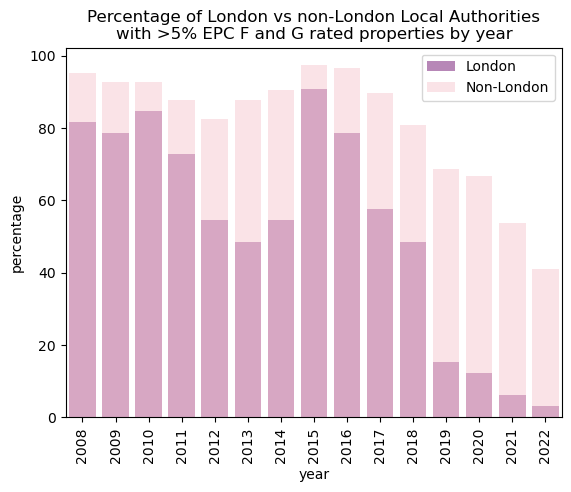

<Figure size 640x480 with 0 Axes>

In [34]:
ax5 = sns.barplot(data=london_f_and_g, x='year', y='pct_of_total_las'
                  , color='purple', alpha=.5, label='London')
ax6 = sns.barplot(data=non_london_f_and_g, x='year', y='pct_of_total_las'
                  , color='pink', alpha=.5, label='Non-London')
plt.xlabel('year')
plt.xticks(rotation=90)
plt.ylabel('percentage')
plt.title('Percentage of London vs non-London Local Authorities\nwith >5% EPC F and G rated properties by year')

handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles, labels)

plt.show()

plt.savefig('f_g_5pct.jpg')

It looks as though both London and the wider non-London local authorities of England and Wales have seen a drop in the percentage of properties with F and G ratings over time. However, it looks like the trend has been more pronounced in London versus outside of London, particularly since 2019. Let's check that.

In [35]:
#Find regression trend of both groups

from sklearn.linear_model import LinearRegression

# Training data
X_london = london_f_and_g.loc[:, ['year']]  # features
y_london = london_f_and_g.loc[:, 'pct_of_total_las']  # target

# Train the model
model = LinearRegression()
model.fit(X_london, y_london)

y_pred_london = pd.Series(model.predict(X_london), index=X_london.index)

In [36]:
# Training data
X_non_london = non_london_f_and_g.loc[:, ['year']]  # features
y_non_london = non_london_f_and_g.loc[:, 'pct_of_total_las']  # target

# Train the model
model = LinearRegression()
model.fit(X_non_london, y_non_london)

y_pred_non_london = pd.Series(model.predict(X_non_london), index=X_non_london.index)

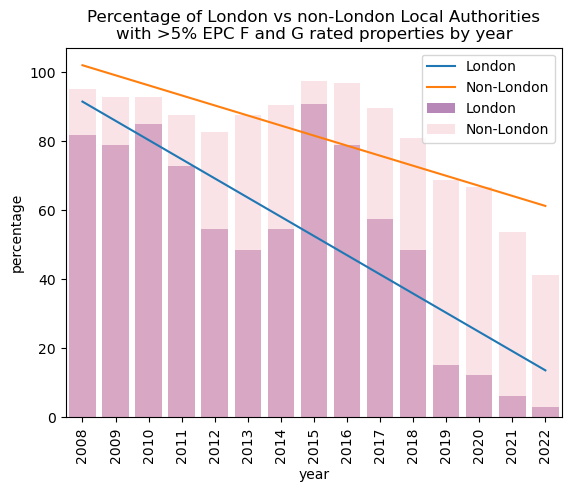

<Figure size 640x480 with 0 Axes>

In [37]:
#Replotting with the regression lines

ax7 = y_pred_london.plot(label='London')
ax8 = y_pred_non_london.plot(label='Non-London')


ax5 = sns.barplot(data=london_f_and_g, x='year', y='pct_of_total_las'
                  , color='purple', alpha=.5, label='London')
ax6 = sns.barplot(data=non_london_f_and_g, x='year', y='pct_of_total_las'
                  , color='pink', alpha=.5, label='Non-London')
plt.xlabel('year')
plt.xticks(rotation=90)
plt.ylabel('percentage')
plt.title('Percentage of London vs non-London Local Authorities\nwith >5% EPC F and G rated properties by year')

handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles, labels)

plt.show()

plt.savefig('f_g_5ct_with_trends.jpg')

From the above lines of regression we can see that London Boroughs have had a steeper, and therefore faster and more dramatic decrease in the percentage of F and G EPC rated properties being registered per year, compared to Local Authorities outside of London. 

Both regions show a decline in the overall percent of F and G rated properties being registered, indicating that property energy efficiency over England and Wales is increasing. 

Note that this data just represents new EPC registrations yearly. EPCs are valid for 10 years, and are usually renewed when a property is sold or a new rental agreement is required, after the previous EPC has expired. So by no means does the data cover the whole property market, but it does give us a slice of the picture where property movement is taking place.

In the London data we see a dramatic drop in the percentage of F and G rated properties between 2018 and 2019. It is possible that this reflects changes to the **Minimum Energy Efficiency Standards (MEES)**. Introduced in 2018 to England and Wales,  properites with new tenancy agreements (or renewals of existing tenants) are required to be EPC rating E or above. 

With London being such a popular place and renting common in the capital, it is reasonable that this dramatic drop in the years after 2018 reflects the scale of these reforms. Reference: [Gov.uk Guidance](https://www.gov.uk/guidance/domestic-private-rented-property-minimum-energy-efficiency-standard-landlord-guidance)

One way we can confirm this is by seeing if E-rated or above properties have increased over time instead.

In [38]:
#Want to creat a stacked bar chart of London Borough EPC ratings over the years

#Creating a filter for just years and EPC rating percentages in London Boroughs
needed_cols = ['year','percentage_a', 'percentage_b', 'percentage_c',
           'percentage_d', 'percentage_e', 'percentage_f', 'percentage_g']

pct_cols = ['percentage_a', 'percentage_b', 'percentage_c',
           'percentage_d', 'percentage_e', 'percentage_f', 'percentage_g']

london_pcts = df_years[(df_years['is_greater_london'] == True)][needed_cols]

#As we have data for many Boroughs, will take the mean
#percentage of properties in each rating per year, via a groupby
london_pcts_mean = london_pcts.groupby('year')[pct_cols].mean()

In [39]:
london_pcts_mean

,percentage_a,percentage_b,percentage_c,percentage_d,percentage_e,percentage_f,percentage_g
year,,,,,,,
2008,0.220000,12.075455,24.875758,29.986667,25.718485,6.588182,0.525455
2009,0.590606,9.098485,24.007576,32.534848,26.756364,6.526667,0.481818
2010,0.915758,9.243636,22.713636,32.236667,27.472121,6.948182,0.469697
2011,2.780303,11.624848,23.080303,32.178788,24.073333,5.681515,0.582727
2012,3.542121,13.858485,23.684242,31.762424,21.743333,4.856061,0.554545
2013,2.854848,11.149091,23.996061,33.625758,23.117576,4.744848,0.513636
2014,2.952121,11.180303,22.387576,34.689091,23.394848,4.864242,0.533030
2015,4.258182,12.468788,19.085152,30.406364,26.027273,6.956061,0.797273
2016,5.927576,12.951818,19.523939,28.681818,25.457879,6.770303,0.688182


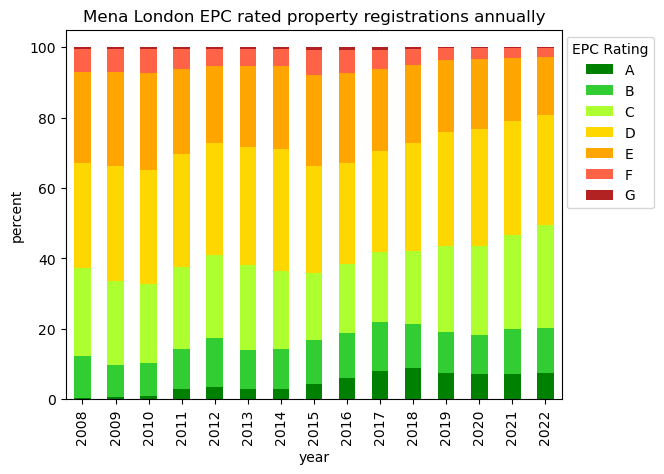

<Figure size 640x480 with 0 Axes>

In [40]:
#I want to create a stacked barchart with the data above to visualise how the proportions change over time
label = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
london_pcts_mean.plot(kind='bar', stacked=True, color=['green','limegreen', 'greenyellow','gold','orange',
                                                       'tomato', 'firebrick'])
plt.legend(bbox_to_anchor=(1.2,1), loc='upper right', labels=label, title='EPC Rating')
plt.title('Mena London EPC rated property registrations annually')
plt.ylabel('percent')

plt.show()

plt.savefig('stacked_london.jpg')

We can see from the above chart that London overall has seen an increase in the proportion of higher-grade properties being registered yearly, compared to properties with rating E or lower. It appears that properties with a C or D rating have become the most commonly registered groups since 2018, again coinciding with the introduction of MEES.

I'll create the same chart for LAs outside of London and see how it compares

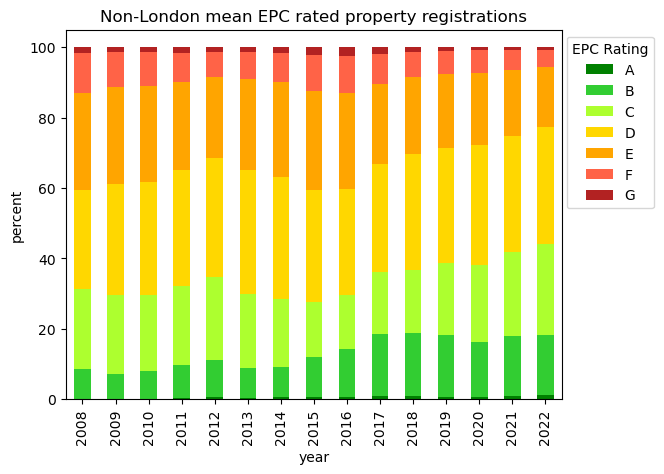

<Figure size 640x480 with 0 Axes>

In [41]:
#Filter for non-London Local Authorities
non_london_pcts = df_years[(df_years['is_greater_london'] == False)][needed_cols]

#As we have data for many LAs, will take the mean
#percentage of properties in each rating per year, via a groupby
non_london_pcts_mean = non_london_pcts.groupby('year')[pct_cols].mean()

non_london_pcts_mean.plot(kind='bar', stacked=True, color=['green','limegreen', 'greenyellow','gold','orange',
                                                       'tomato', 'firebrick'])
plt.legend(bbox_to_anchor=(1.2,1), loc='upper right', labels=label, title='EPC Rating')
plt.title('Non-London mean EPC rated property registrations')
plt.ylabel('percent')

plt.show()

plt.savefig('stacked_non_london.jpg')

Outside of London we see some similar trends to the above. For example, there is an increase in the proportion of properties with rating D or higher since around 2017. This is perhaps indicating that landlords outside the capital prepared earlier for the MEES regulations (though this is just speculative). 

Overall, E or lower rated properties are becoming a smaller proportion of the overall property stock outside of London, being displaced by D and C rated properties.

One of the more notable differences between the London and non-London stacked charts is that A-rated properties are much more common in the capital. One explanation might be that upgrading a home's energy efficiency does not always come cheaply. The relative difference in wealth in London versus the rest of England and Wales may reflect the ability of landlords and homeowners in that region to invest in their homes to a greater degree than in regional areas. 

Another explanation could be that the very comepetitive element of London property market means that customers (in particular, property buyers) expect better standards from their properties, and have the ability to be fussier about energy ratings, leading to overall standards increasing.